# Describing and Visualizing Relationships

In [1]:
#https://vimeo.com/738768565
install.packages("vembedr")
library("vembedr")
embed_vimeo("738768565")


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpdrjvhJ/downloaded_packages


Shiny tags cannot be represented in plain text (need html)

Is there a relationship between high cholesterol and heart disease? Do people who care for cats live longer? Is your university's admissions department biased where they focus on preferential treatment based on race or gender and not test scores?

Tackling these questions is only possible when we take a step beyond simply describing univariate datasets.

Let's discuss:

- Multivariate data
- Relationships between a categorical and continuous variable
- Relationships between two categorical variables
- Visualization methods

### Table of Contents <a class="anchor" id="DS102L1-WS2.5_toc"></a>

* [Table of Contents](#DS102L1-WS2.5_toc)
    * [Page 1 - Multivariate Data](#DS102L1-WS2.5_page_1)
    * [Page 2 - Relationships between a categorical and continuous variable](#DS102L1-WS2.5_page_2)
    * [Page 3 - Relationships between two categorical variables ](#DS102L1-WS2.5_page_3)
    * [Page 4 - The Relationship between two continuous variables](#DS102L1-WS2.5_page_4)
    * [Page 5 - Covariance](#DS102L1-WS2.5_page_5)
    * [Page 6 - Pearson's correlation coefficient](#DS102L1-WS2.5_page_6)
    * [Page 7 - Comparing multiple correlations](#DS102L1-WS2.5_page_7)
    * [Page 8 - Visualization Methods: categorical and continuous variables ](#DS102L1-WS2.5_page_8)
    * [Page 9 - Visualization Methods: Two categorical variables](#DS102L1-WS2.5_page_9)
    * [Page 10 - Visualization Methods: Two continuous variables ](#DS102L1-WS2.5_page_10)
    * [Page 11 - Visualization Methods: More than two continuous variables ](#DS102L1-WS2.5_page_11)
    * [Page 12 - Summary ](#DS102L1-WS2.5_page_12)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Page 1 - Multivariate data <a class="anchor" id="DS102L1-WS2.5_page_1"></a>

[Back to Top](#DS102L1-WS2.5_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

Multivariate data, is a fancy way of saying samples containing more than one variable.

A reader might remark that all the datasets that we've worked with so far (mtcars and airquality) have contained more than one variable. 

This is true but only technically. We've only been working with a single variables at a time. 

Note that multivariate analytics is not the same as doing univariate analytics.

Describing relationships involve several variables at the same time.

remember the airquality dataset?

In [1]:
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


Let's explore whether there is a relationship between temperature and the month in which the temperature was taken.

The kind of multivariate analysis you perform is heavily influenced by the type of data that you are working with. 

There are three broad classes of bivariate (or two variable) relationships:

- The relationship between one categorical variable and one continuous variable
- The relationship between two categorical variables
- The relationship between two continuous variables



<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Page 2 - Relationships between a Categorical and Continuous variable <a class="anchor" id="DS102L1-WS2.5_page_2"></a>

[Back to Top](#DS102L1-WS2.5_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

Describing the relationship between categorical and continuous variables is perhaps the most familiar of the three broad categories we're going to discuss.

Take for instance a science fair project. Say for instance, you chose to water some lentil sprouts with tap water and some with alcohol to see if they grew differently.

When we measure the heights and compare the measurements of the no-alcohol watered lentils versus the alcohol lentils, we are pointing out a relationship between a categorical variable (alcohol/no-alcohol) and a continuous variable (heights of the seedling lentils).

The alcohol could have made the lentils grow faster (it didn't), grow slower (it did), or grow at the same rate as the tap water lentils. All three of these possibilities constitute a relationship: __greater than, less than, or equal to__.

To demonstrate how to uncover the relationship between these two types of variables in R, we will be using the iris dataset that is conveniently built right into R:

In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


This is a famous dataset and is used today primarily for teaching purposes. It gives the lengths and widths of the petals and sepals (another part of the flower) of 150 Iris flowers. Of the 150 flowers, it has 50 measurements each from three different species of Iris flowers: setosa, versicolor, and virginica.

By now, you should know how to take the mean of all the petal lengths:

In [3]:
mean(iris$Petal.Length) 

[1] 3.758

We could also take the mean of the petal lengths of each of the three species to see if there is any difference in the means.

Naively, one might approach this task in R as follows:

In [4]:
mean(iris$Petal.Length[iris$Species=="setosa"]) 
mean(iris$Petal.Length[iris$Species=="versicolor"]) 
mean(iris$Petal.Length[iris$Species=="virginica"])

[1] 1.462

[1] 4.26

[1] 5.552

As you might imagine, there is a far easier way to do this:

In [5]:
by(iris$Petal.Length, iris$Species, mean)

iris$Species: setosa
[1] 1.462
------------------------------------------------------------ 
iris$Species: versicolor
[1] 4.26
------------------------------------------------------------ 
iris$Species: virginica
[1] 5.552

In [ ]:
#?by

The __by__ function is a handy function that applies a function to split the subsets of data. In this case, the Petal.Length vector is divided into three subsets for each species, and then the mean function is called on each of these subsets. It appears as if the setosas in this sample have way shorter petals than the other two species, with the virginica sample's petal length beating out versicolor's by a smaller margin.

Although means are probably the most common statistic to be compared between categories, it is not the only statistic we can use to compare. If we had reason to believe that the virginicas have a more widely varying petal length than the other two species, we could pass the sd function to the by function as follows:

In [6]:
by(iris$Petal.Length, iris$Species, sd) 

iris$Species: setosa
[1] 0.173664
------------------------------------------------------------ 
iris$Species: versicolor
[1] 0.469911
------------------------------------------------------------ 
iris$Species: virginica
[1] 0.5518947

Most often, though, we want to be able to compare many statistics between groups at one time. To this end, it's very common to pass in the summary function:

In [7]:
by(iris$Petal.Length, iris$Species, summary)

iris$Species: setosa
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.400   1.500   1.462   1.575   1.900 
------------------------------------------------------------ 
iris$Species: versicolor
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    4.00    4.35    4.26    4.60    5.10 
------------------------------------------------------------ 
iris$Species: virginica
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.500   5.100   5.550   5.552   5.875   6.900 

As common as this idiom is, it still presents us with a lot of dense information that is difficult to make sense of at a glance. It is more common still to visualize the differences in continuous variables between categories using a box-and-whisker plot:

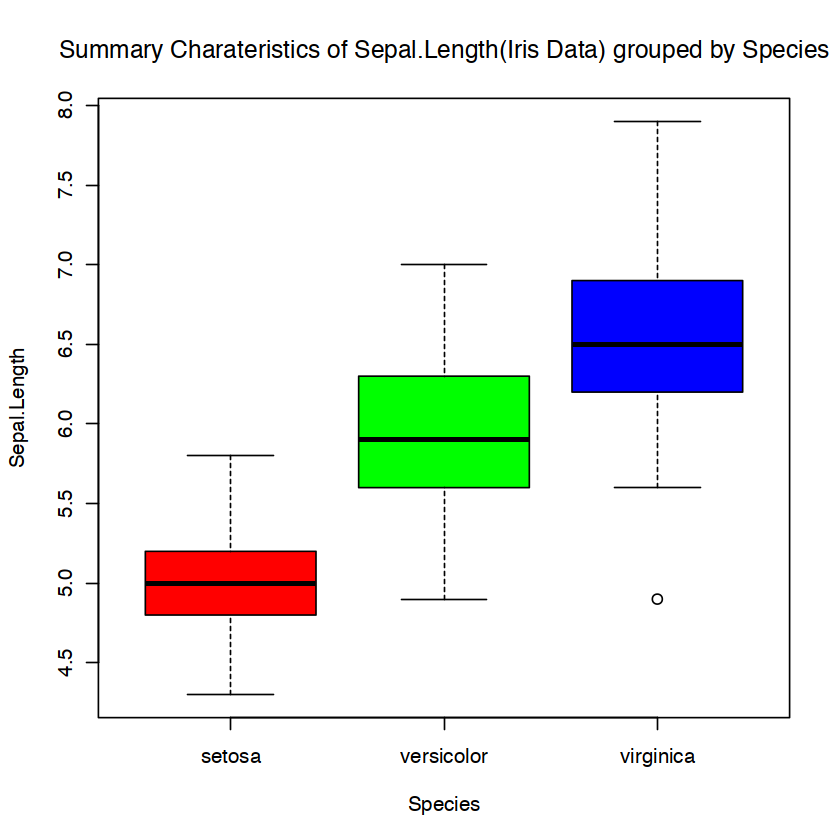

In [8]:
# ?boxplot
boxplot(Sepal.Length~Species, data = iris, col=c("red","green","blue"), main="Summary Charateristics of Sepal.Length(Iris Data) grouped by Species")

A box-and-whisker plot (or simply, a box plot if you have places to go and you're in a rush) displays a stunningly large amount of information in a single chart. Each categorical variable has its own box and whiskers. The bottom and top ends of the box represent the first and third quartile respectively, and the black band inside the box is the median for that group, as shown in the following figure:

<p style="text-align: left">
  <img  src="Anatomy-Boxplot.png" width="400" alt="Anatomy of a Boxplot">
</p>

What if you wanted to reorder the species?

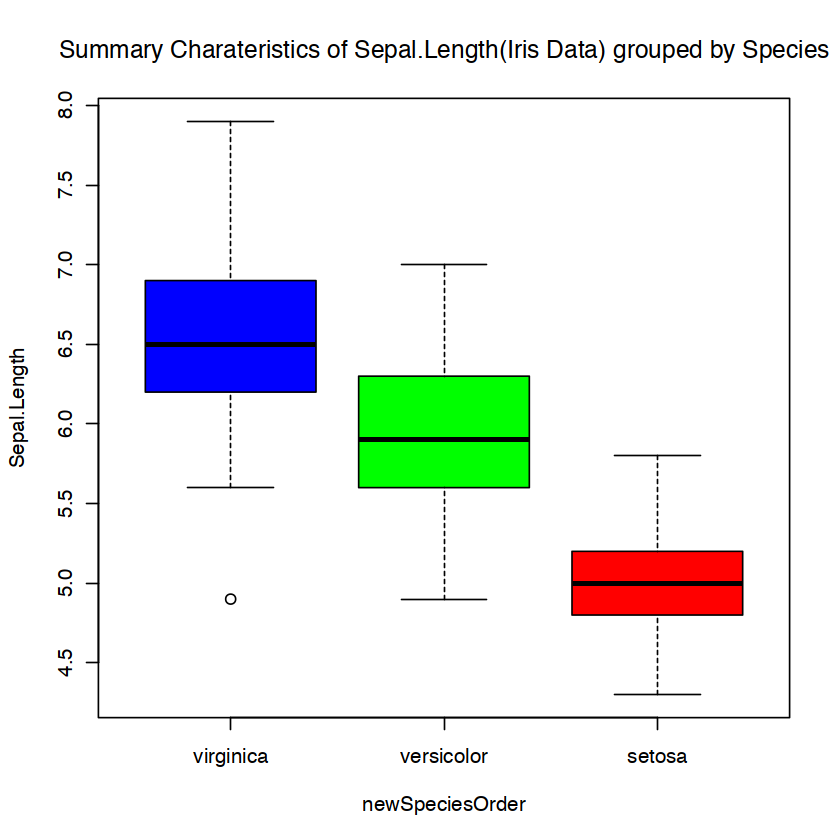

In [9]:
newSpeciesOrder <- factor(iris$Species, levels=c("virginica","versicolor","setosa"))
boxplot(Sepal.Length~newSpeciesOrder, data = iris, col=c("blue","green","red"), main="Summary Charateristics of Sepal.Length(Iris Data) grouped by Species")

What If you want to specify a better name for your groups you can use the Names parameter. It take a vector of the size of the levels of categorical variable.

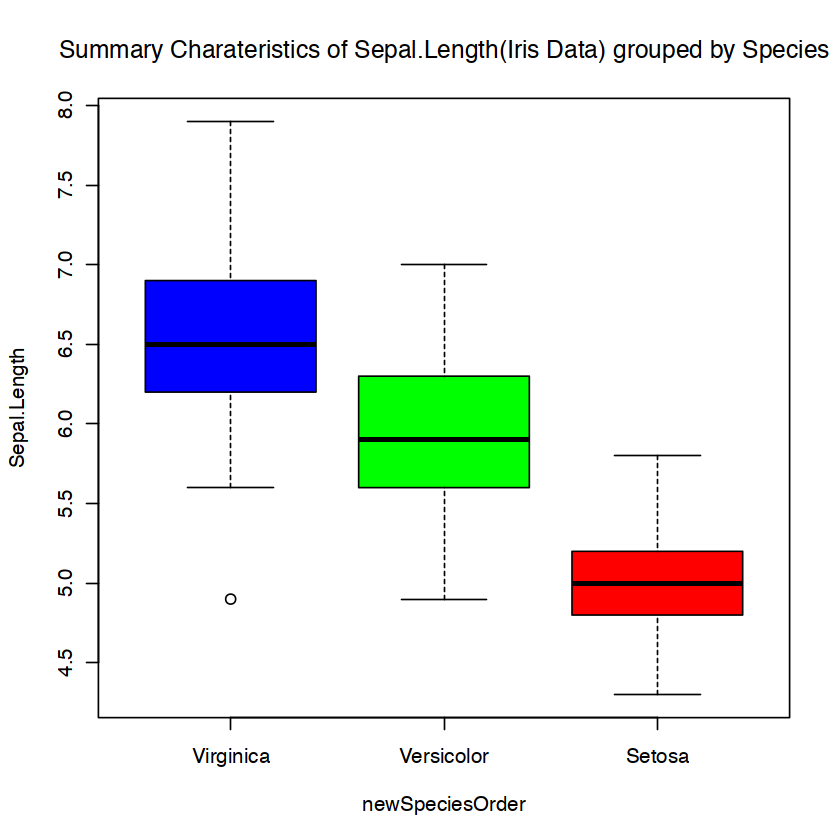

In [10]:
boxplot(Sepal.Length~newSpeciesOrder, data = iris, col=c("blue","green","red"), main="Summary Charateristics of Sepal.Length(Iris Data) grouped by Species", names= c("Virginica","Versicolor","Setosa"))

Depending on whom you talk to and what you use to produce your plots, the edges of the whiskers can mean a few different things. How to read the boxplot can vary, in called Tukey's variation, the bottom of the whiskers extend to the lowest datum within 1.5 times the interquartile range below the bottom of the box. Similarly, the very top of the whisker represents the highest datum 1.5 interquartile ranges above the third quartile (remember: interquartile range is the third quartile minus the first). This is, coincidentally, the variation that ggplot2 uses.

The great thing about box plots is that not only do we get a great sense of the central tendency and dispersion of the distribution within a category, but we can also immediately spot the important differences between each category.

From the box plot in the previous image, it's easy to tell what we already know about the central tendency of the petal lengths between species: that the setosa in this sample have the shortest petals; that the virginica have the longest on average; and that versicolor are in the middle, but are closer to the virginica.

In addition, we can see that the setosas have the thinnest dispersion, and that the virginica have the highest—when you disregard the outlier.

Remember, we are not saying anything or drawing any conclusions yet about Iris flowers in general. In all of these analyses, we are treating all the data we have as the population of interest; in this example, the 150 flowers measured are our population of interest.

Before we move on to the next broad category of relationships, let's look at the airquality dataset, treat the month as the categorical variable, the temperature as the continuous variable, and see if there is a relationship between the average temperature across months:

In [11]:
by(airquality$Temp, airquality$Month, mean) 

airquality$Month: 5
[1] 65.54839
------------------------------------------------------------ 
airquality$Month: 6
[1] 79.1
------------------------------------------------------------ 
airquality$Month: 7
[1] 83.90323
------------------------------------------------------------ 
airquality$Month: 8
[1] 83.96774
------------------------------------------------------------ 
airquality$Month: 9
[1] 76.9

This is precisely what we would expect from a city in the Northern hemisphere:

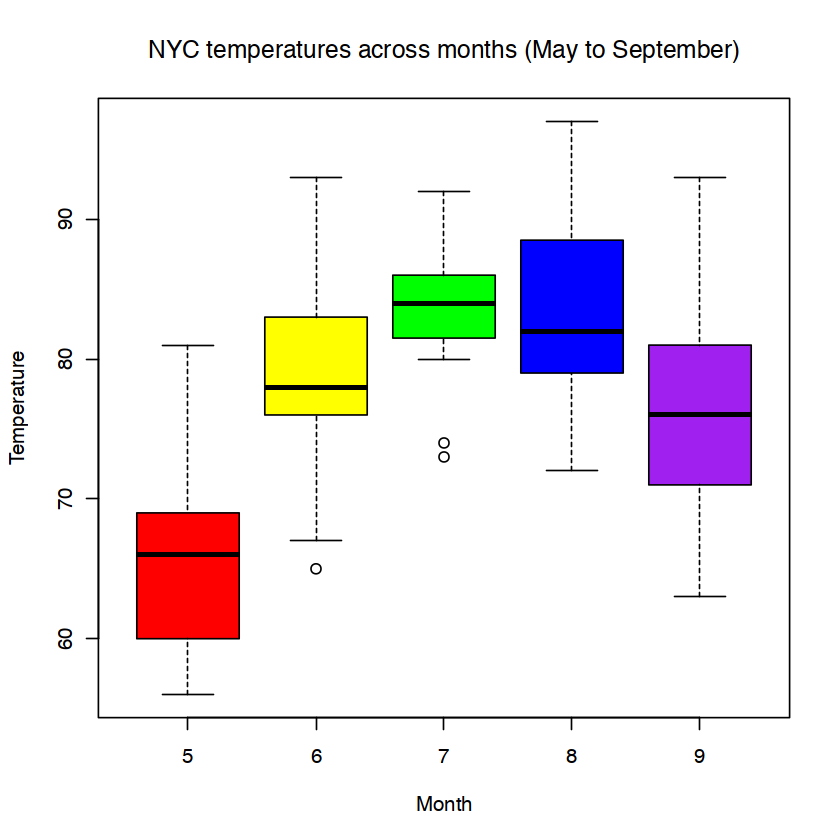

In [12]:
airquality <- transform(airquality, Month = factor(Month))
boxplot(Temp ~ Month, airquality, xlab = "Month", ylab = "Temperature", main="NYC temperatures across months (May to September)", col=c("red","yellow","green","blue","purple"))


<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Page 3 - Relationships between two Categorical variables <a class="anchor" id="DS102L1-WS2.5_page_3"></a>

[Back to Top](#DS102L1-WS2.5_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

Describing the relationships between two categorical variables is done somewhat less often than the other two broad types of bivariate analyses, but it is just as fun (and useful)!

To explore this technique, we will be using the UCBAdmissions dataset, which contains the data on graduate school applicants to the University of California Berkeley (UCB) in 1973.

Before we get started, we have to wrap the dataset in a call to data.frame to coerce it into a data frame type variable—I'll explain why, soon:

In [13]:
ucba <- data.frame(UCBAdmissions) 
head(ucba)

,Admit,Gender,Dept,Freq
,<fct>,<fct>,<fct>,<dbl>
1,Admitted,Male,A,512
2,Rejected,Male,A,313
3,Admitted,Female,A,89
4,Rejected,Female,A,19
5,Admitted,Male,B,353
6,Rejected,Male,B,207


Now, what we want is a count of the frequencies of number of students in each of the following four categories:

- Accepted female
- Rejected female
- Accepted male
- Rejected male

Do you remember the frequency tabulation at the beginning of the last workshop? This is similar—except that now we are dividing the set by one more variable. This is known as cross-tabulation or cross tab. It is also sometimes referred to as a contingency table. The reason we had to coerce UCBAdmissions into a data frame is because it was already in the form of a cross tabulation (except that it further broke the data down into the different departments of the grad school). Check it out by typing UCBAdmissions at the prompt.



In [14]:
# below is in the form of a cross tabulation
UCBAdmissions

, , Dept = A

          Gender
Admit      Male Female
  Admitted  512     89
  Rejected  313     19

, , Dept = B

          Gender
Admit      Male Female
  Admitted  353     17
  Rejected  207      8

, , Dept = C

          Gender
Admit      Male Female
  Admitted  120    202
  Rejected  205    391

, , Dept = D

          Gender
Admit      Male Female
  Admitted  138    131
  Rejected  279    244

, , Dept = E

          Gender
Admit      Male Female
  Admitted   53     94
  Rejected  138    299

, , Dept = F

          Gender
Admit      Male Female
  Admitted   22     24
  Rejected  351    317


### We can use the xtabs function in R to make our own cross-tabulations:

In [15]:
# the first argument to xtabs (the formula) should 
  # be read as: frequency *by* Gender and Admission 
  cross <- xtabs(Freq ~ Gender+Admit, data=ucba) 
  cross

        Admit
Gender   Admitted Rejected
  Male       1198     1493
  Female      557     1278

Here, at a glance, we can see that there were 1198 males that were admitted, 557 females that were admitted, and so on.

Is there a gender bias in UCB's graduate admissions process? Perhaps, but it's hard to tell from just looking at the 2 x 2 contingency table. Sure, there are fewer females accepted than males, but there are also, unfortunately, far fewer females that applied to UCB in the first place.

To aid us in either implicating UCB of a biased admissions machine or exonerating them, it would help to look at a proportions table. Using a proportions table, we can easily compare the proportion of the total number of males who were accepted versus the proportion of the total number of females who were accepted. If the proportions are more or less equal, we can conclude that gender does not constitute a factor in UCB's admissions process. If this is the case, gender and admission status is said to be conditionally independent:

In [16]:
prop.table(cross, 1) 

        Admit
Gender    Admitted  Rejected
  Male   0.4451877 0.5548123
  Female 0.3035422 0.6964578

Why did I supply 1 as an argument to prop.table? Look up the documentation at the R prompt. When would we want to use prop.table(cross, 2)?

In [ ]:
?prop.table

Here, we can see that while 45 percent of the males who applied were accepted, only 30 percent of the females who applied were accepted. This is evidence that the admissions department is sexist, right? Not so fast!

This is precisely what a lawsuit lodged against UCB purported. When the issue was looked into further, it was discovered that, at the department level, women and men actually had similar admissions rates. In fact, some of the departments appeared to have a small but significant bias in favor of women. Check out department A's proportion table, for example:

In [17]:
 cross2 <- xtabs(Freq ~ Gender + Admit, data=ucba[ucba$Dept=="A",]) 
 prop.table(cross2, 1) 

        Admit
Gender    Admitted  Rejected
  Male   0.6206061 0.3793939
  Female 0.8240741 0.1759259

If there were any bias in admissions, this data didn't prove it. This phenomenon, where a trend that appears in combined groups of data disappears or reverses when broken down into groups, is known as [Simpson's Paradox](https://www.britannica.com/topic/Simpsons-paradox). In this case, it was caused by the fact that women tended to apply to departments that were far more selective.

This is probably the most famous case of Simpson's Paradox, and it is also why this dataset is built into R. The lesson here is to be careful when using pooled data and look out for hidden variables.

In [18]:
# Department B looks to be more even in the selection process 
cross3 <- xtabs(Freq ~ Gender + Admit, data=ucba[ucba$Dept=="B",]) 
 prop.table(cross3, 1) 

        Admit
Gender    Admitted  Rejected
  Male   0.6303571 0.3696429
  Female 0.6800000 0.3200000

In [19]:
# Department C looks to be more even in the selection process as well
cross4 <- xtabs(Freq ~ Gender + Admit, data=ucba[ucba$Dept=="C",]) 
 prop.table(cross4, 1) 

        Admit
Gender    Admitted  Rejected
  Male   0.3692308 0.6307692
  Female 0.3406408 0.6593592

In [20]:
# Department D looks to be more even in the selection process as well
cross5 <- xtabs(Freq ~ Gender + Admit, data=ucba[ucba$Dept=="D",]) 
 prop.table(cross5, 1) 

        Admit
Gender    Admitted  Rejected
  Male   0.3309353 0.6690647
  Female 0.3493333 0.6506667

In [21]:
# Department D looks to be more even in the selection process as well
cross6 <- xtabs(Freq ~ Gender + Admit, data=ucba[ucba$Dept=="E",]) 
 prop.table(cross6, 1) 

        Admit
Gender    Admitted  Rejected
  Male   0.2774869 0.7225131
  Female 0.2391858 0.7608142

In [22]:
# Department D looks to be more even in the selection process as well
cross7 <- xtabs(Freq ~ Gender + Admit, data=ucba[ucba$Dept=="F",]) 
 prop.table(cross7, 1) 

        Admit
Gender     Admitted   Rejected
  Male   0.05898123 0.94101877
  Female 0.07038123 0.92961877

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Page 4 - The relationship between two continuous variables <a class="anchor" id="DS102L1-WS2.5_page_4"></a>

[Back to Top](#DS102L1-WS2.5_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

Do you think that there is a relationship between women's heights and their weights? If you said yes, congratulations, you're right!

We can verify this assertion using the data in R's built-in dataset, women, which holds the height and weight of 15 American women from ages 30 to 39:

In [23]:
head(women) 

,height,weight
,<dbl>,<dbl>
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126
6,63,129


In [24]:
nrow(women)

[1] 15

Specifically, this relationship is referred to as a positive relationship, because as one of the variable increases, we expect an increase in the other variable.

The most typical visual representation of the relationship between two continuous variables is a scatterplot.

A scatterplot is displayed as a group of points whose position along the x axis is established by one variable, and the position along the y axis is established by the other. When there is a positive relationship, the dots, for the most part, start in the lower-left corner and extend to the upper-right corner, as shown in the following figure. When there is a negative relationship, the dots start in the upper-left corner and extend to the lower-right one. When there is no relationship, it will look as if the dots are all over the place:

In [25]:
str(women)

'data.frame':	15 obs. of  2 variables:
 $ height: num  58 59 60 61 62 63 64 65 66 67 ...
 $ weight: num  115 117 120 123 126 129 132 135 139 142 ...


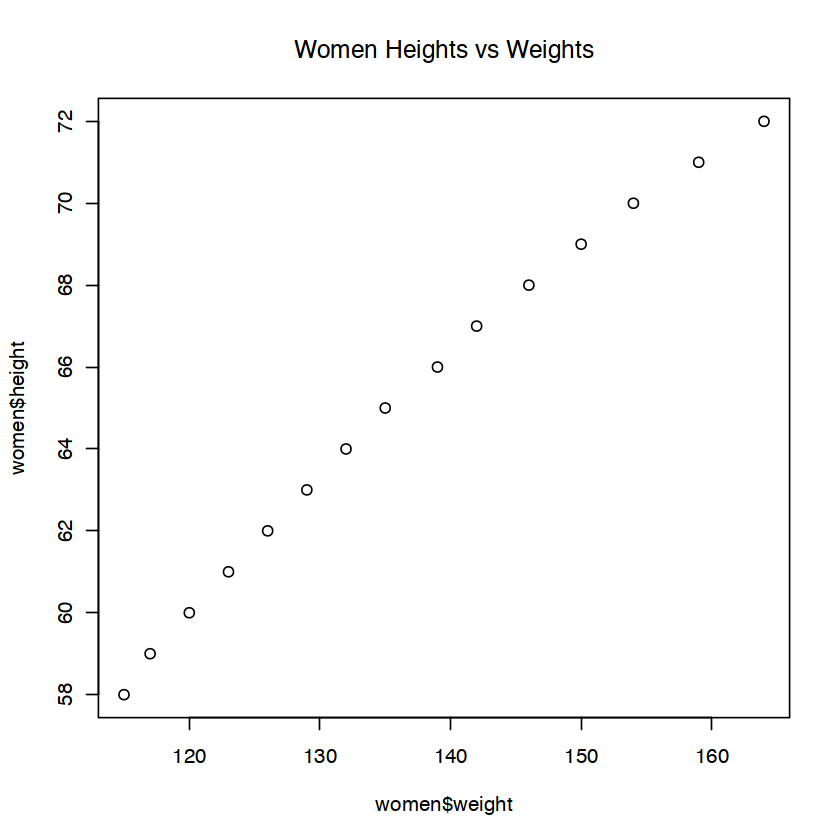

In [26]:
plot(women$weight,women$height, main = "Women Heights vs Weights")

The more the dots look like they form a straight line, the stronger is the relationship between two continuous variables; the more diffuse the points, the weaker is the relationship. The dots in the preceding figure look almost exactly like a straight line—this is pretty much as strong a relationship as they come.

These kinds of relationships are colloquially referred to as correlations.

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Page 5 - Covariance <a class="anchor" id="DS102L1-WS2.5_page_5"></a>

[Back to Top](#DS102L1-WS2.5_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

As always, visualizations are great—necessary even—but on most occasions, we are going to quantify these correlations and summarize them with numbers.

The simplest measure of correlation that is widely used is covariance. For each pair of values from the two variables, the differences from their respective means are taken. Then, those values are multiplied. If they are both positive (that is, both the values are above their respective means), then the product will be positive too. If both the values are below their respective means, the product is still positive, because the product of two negative numbers is positive. Only when one of the values is above its mean will the product be negative:

$$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$$

Remember, in sample statistics, we divide by the degrees of freedom and not the sample size.

We can find the covariance between two variables in R using the cov function. Let's find the covariance between the heights and weights in the dataset, women:

In [27]:
cov(women$weight, women$height)

[1] 69

In [28]:
# the order we put the two columns in 
  # the arguments doesn't matter 
 cov(women$height, women$weight) 

[1] 69

The covariance is positive, which denotes a positive relationship between the two variables.

The covariance, by itself, is difficult to interpret. It is especially difficult to interpret in this case, because the measurements use different scales: inches and pounds. It is also heavily dependent on the variability in each variable.

Consider what happens when we take the covariance of the weights in pounds and the heights in centimeters:

In [29]:
# there are 2.54 centimeters in each inch 
# changing the units to centimeters increases 
# the variability within the height variable 
cov(women$height*2.54, women$weight)

[1] 175.26

Semantically speaking, the relationship hasn't changed, so why should the covariance?

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Page 6 - Pearson's correlation coefficient <a class="anchor" id="DS102L1-WS2.5_page_6"></a>

[Back to Top](#DS102L1-WS2.5_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

A solution to this quirk of covariance is to use Pearson's correlation coefficient instead. Outside its colloquial context, when the word correlation is uttered—especially by analysts, statisticians, or scientists—it usually refers to Pearson's correlation.

Pearson's correlation coefficient is different from covariance in that, instead of using the sum of the products of the deviations from the mean in the numerator, it uses the sum of the products of the number of standard deviations away from the mean. These number-of-standard-deviations-from-the-mean are called z-scores. If a value has a z-score of 1.5, it is 1.5 standard deviations above the mean; if a value has a z-score of -2, then it is 2 standard deviations below the mean.

Pearson's correlation coefficient is usually denoted by r and its equation is given as follows:

$$r = \frac{\sum(x-\bar{x})(y-\bar{y})}{(n-1)(s_x s_y)}$$

This is the covariance divided by the product of the two variables' standard deviation.

An important consequence of using standardized z-scores instead of the magnitude of distance from the mean is that changing the variability in one variable does not change the correlation coefficient. Now you can meaningfully compare values using two different scales or even two different distributions. The correlation between weight/height in inches and weight/height in centimeters will now be identical, because multiplication with 2.54 will not change the z-scores of each height:



In [30]:
cor(women$height, women$weight) 
cor(women$height*2.54, women$weight)

[1] 0.9954948

[1] 0.9954948

Another important and helpful consequence of this standardization is that the measure of correlation will always range from -1 to 1. A Pearson correlation coefficient of 1 will denote a perfectly positive (linear) relationship, an r of -1 will denote a perfectly negative (linear) relationship, and an r of 0 will denote no (linear) relationship.

Why is the linear qualification in parentheses?

Intuitively, the correlation coefficient shows how well two variables are described by the straight line that fits the data most closely; this is called a regression or trend line. 

If there is a strong relationship between two variables, but the relationship is not linear, it cannot be represented accurately by Pearson's r. For example, the correlation between 1 to 100 and 100 to 200 is 1 (because it is perfectly linear), but a cubic relationship is not:

In [31]:
#create a vector 1 - 100
xs <- 1:100 

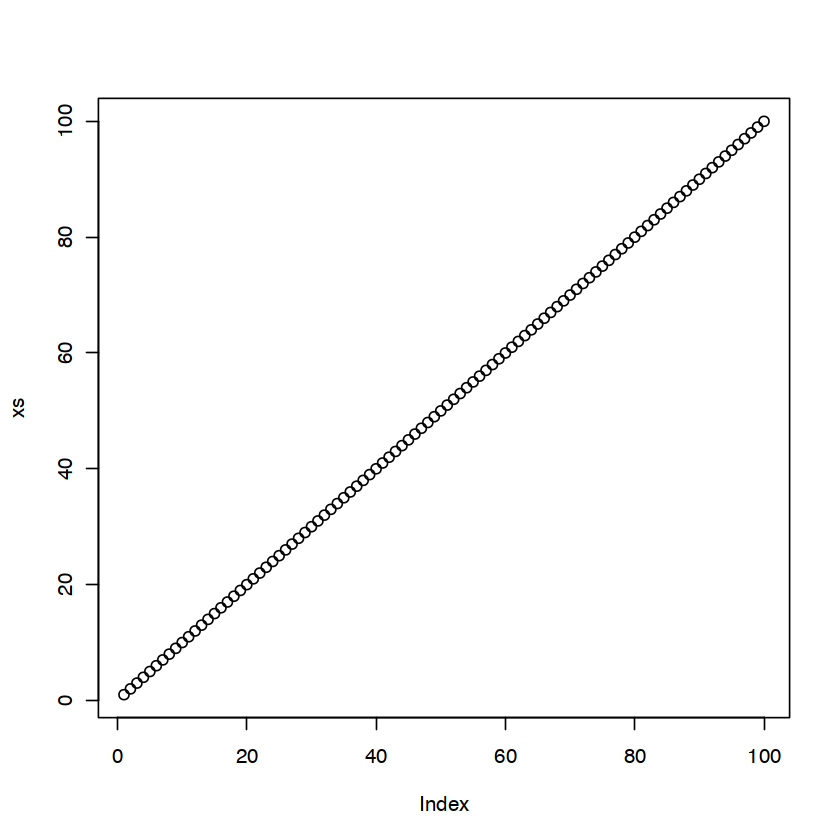

In [32]:
plot(xs)

In [33]:
cor(xs, xs+100) 
cor(xs, xs^3) 

[1] 1

[1] 0.917552

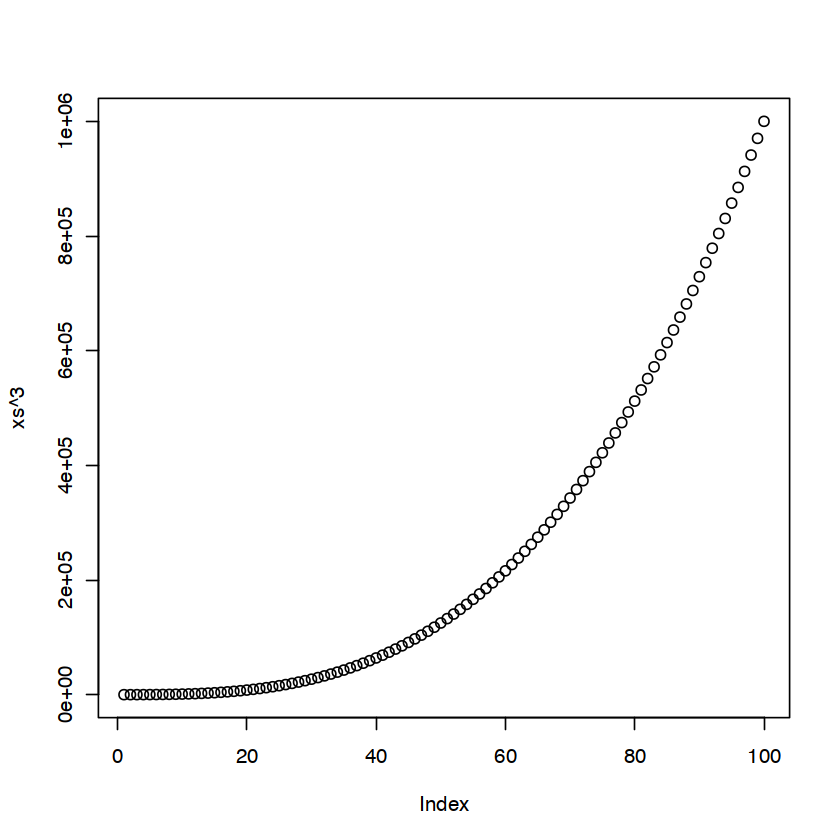

In [34]:
plot(xs^3)

It is still about 0.92, which is an extremely strong correlation, but not the 1 that you should expect from a perfect correlation.

So Pearson's r assumes a linear relationship between two variables. There are, however, other correlation coefficients that are more tolerant of nonlinear relationships. Probably the most common of these is Spearman's rank coefficient, also called Spearman's rho.

Spearman's rho is calculated by taking the Pearson correlation not of the values, but of their ranks.

What's a rank?

When you assign ranks to a vector of numbers, the lowest number gets 1, the second lowest gets 2, and so on. The highest datum in the vector gets a rank that is equal to the number of elements in that vector.

In rankings, the magnitude of the difference in values of the elements is disregarded. Consider a race to a finish line involving three cars. Let's say that the winner in the first place finished at a speed three times that of the car in the second place, and the car in the second place beat the car in the third place by only a few seconds. The driver of the car that came first has a good reason to be proud of herself, but her rank, 1st place, does not say anything about how she effectively cleaned the floor with the other two candidates.

Try using R's rank function on the vector c(8, 6, 7, 5, 3, 0, 9). Now try it on the vector c(8, 6, 7, 5, 3, -100, 99999). The rankings are the same, right?
When we use ranks instead, the pair that has the highest value on both the x and y axes will be c(1,1), even if one variable is a nonlinear function (cubed, squared, logarithmic, and so on) of the other. The correlations that we just tested will both have Spearman rhos of 1, because cubing a value will not change its rank:

In [35]:
rank.vector <- c(8, 6, 7, 5, 3, 0, 9)
rank(rank.vector)

[1] 6 4 5 3 2 1 7

In [36]:
rank.vector2 <- c(8, 6, 7, 5, 3, -100, 99999)
rank(rank.vector2)

[1] 6 4 5 3 2 1 7

In [37]:
xs <- 1:100 
 cor(xs, xs+100, method="spearman") 

[1] 1

In [38]:
cor(xs, xs^3, method="spearman") 

[1] 1

Let's use what we've learned so far to investigate the correlation between the weight of a car and the number of miles it gets to the gallon. Do you predict a negative relationship (the heavier the car, the lower the miles per gallon)?

In [39]:
cor(mtcars$wt, mtcars$mpg) 

[1] -0.8676594

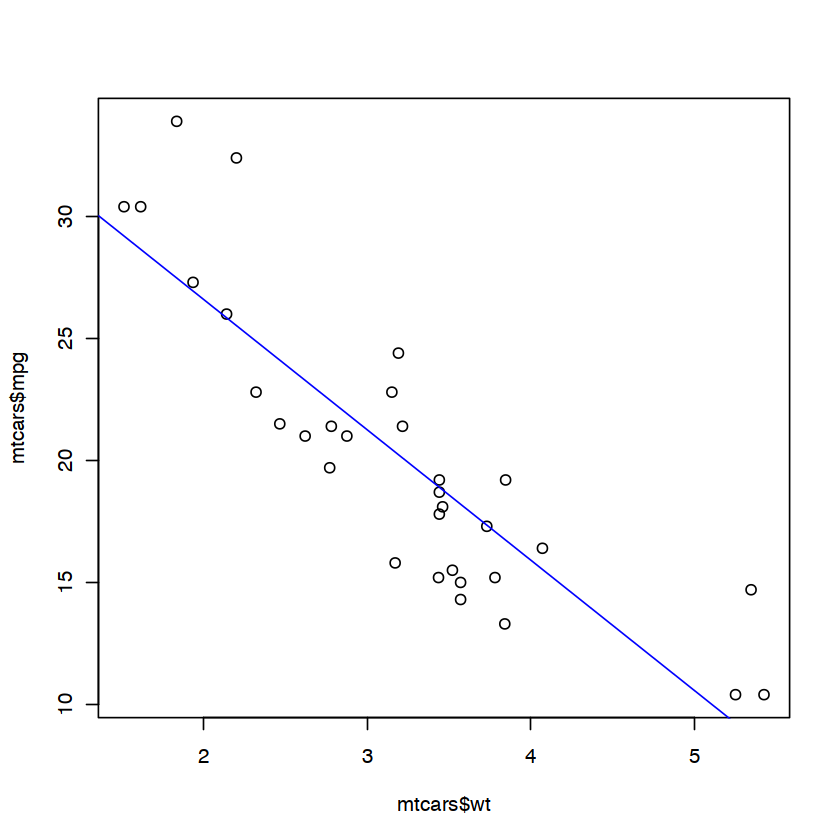

In [40]:
plot(x = mtcars$wt, y = mtcars$mpg) 
abline(lm(mpg ~ wt, data = mtcars), col = "blue")

In [41]:
lm(mtcars$wt ~ mtcars$mpg)


Call:
lm(formula = mtcars$wt ~ mtcars$mpg)

Coefficients:
(Intercept)   mtcars$mpg  
     6.0473      -0.1409  


`geom_smooth()` using formula 'y ~ x'



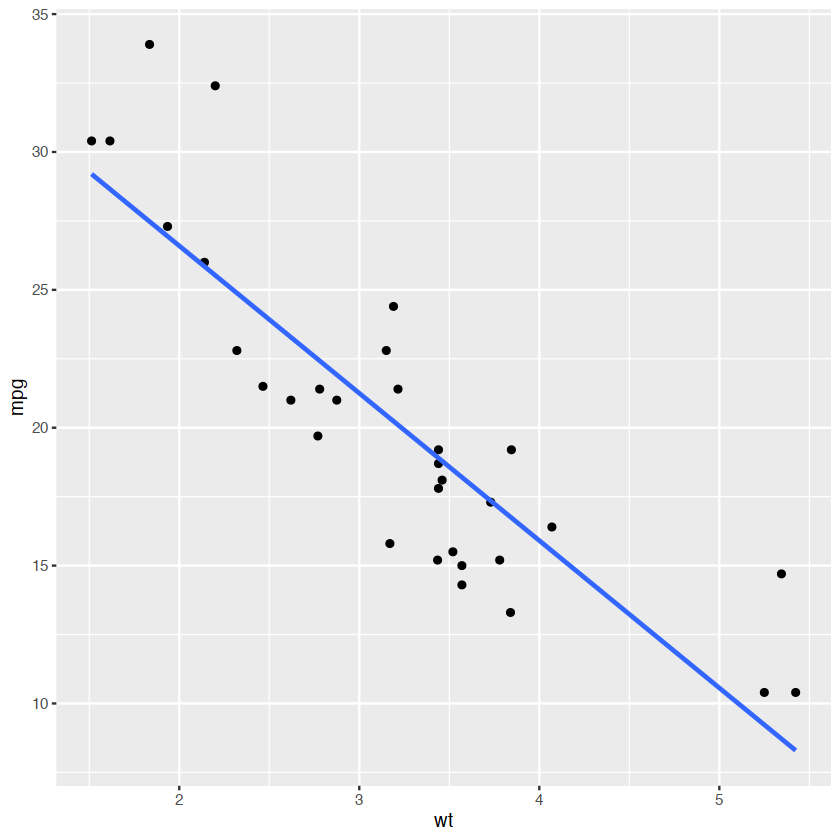

In [43]:
library(ggplot2)
# let's do the same plot a line through the scatter plot with ggplot2 ensure you use library(ggplot2) 
ggplot(data = mtcars, aes(x = wt, y = mpg)) + geom_point(color='black') + geom_smooth(method = "lm", se = FALSE)

This is a strong negative relationship. Although, in the preceding figure, note that the data points are more diffuse and spread around the regression line than in the other plots; this indicates a somewhat weaker relationship than we have seen thus far.

For an even weaker relationship, check out the correlation between wind speed and temperature in the airquality dataset:

In [44]:
cor(airquality$Temp, airquality$Wind) 

[1] -0.4579879

In [45]:
cor(airquality$Temp, airquality$Wind, method="spearman")

[1] -0.4465408

`geom_smooth()` using formula 'y ~ x'



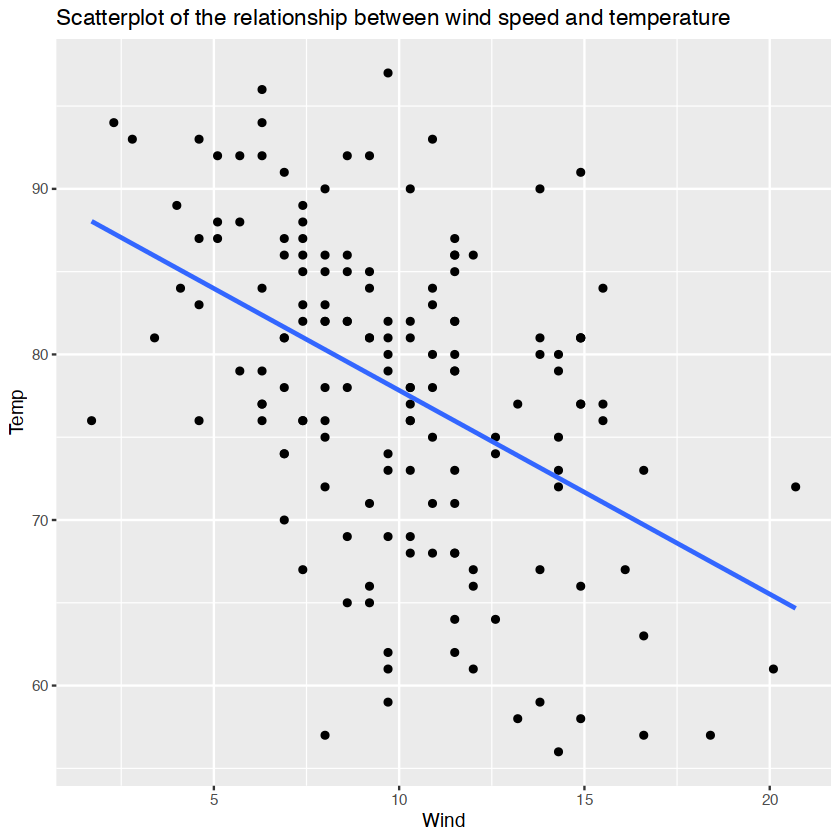

In [46]:
# let's do the same plot a line through the scatter plot with ggplot2 ensure you use library(ggplot2) 
ggplot(data = airquality, aes(x = Wind, y = Temp)) + geom_point(color='black') + geom_smooth(method = "lm", se = FALSE) + ggtitle("Scatterplot of the relationship between wind speed and temperature")

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Page 7 - Comparing multiple correlations <a class="anchor" id="DS102L1-WS2.5_page_7"></a>

[Back to Top](#DS102L1-WS2.5_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

Armed with our new standardized coefficients, we can now effectively compare the correlations between different pairs of variables directly.

In data analysis, it is common to compare the correlations between all the numeric variables in a single dataset. We can do this with the iris dataset using the following R code snippet. __But remember we can't compare correlations if we have other than numeric data!__

In [47]:
colnames(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [48]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [49]:
# we have to subset the iris dataset and drop the 5th column (as species is not numeric) 
 iris.nospecies <- iris[, -5] 
 cor(iris.nospecies) # now we have a correlation matrix

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


This produces a correlation matrix (when it is done with the covariance, it is called a covariance matrix). It is square (the same number of rows and columns) and symmetric, which means that the matrix is identical to its transposition (the matrix with the axes flipped). It is symmetrical, because there are two elements for each pair of variables on either side of the diagonal line of ones. The diagonal line is all ones, because every variable is perfectly correlated with itself. __Which are the most highly (positively) correlated pairs of variables?__ __What about the most negatively correlated?__

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Page 8 - Visualization Methods: categorical and continuous variables <a class="anchor" id="DS102L1-WS2.5_page_8"></a>

[Back to Top](#DS102L1-WS2.5_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

We have seen that box plots are a great way of comparing the distribution of a continuous variable across different categories. As you might expect, box plots are very easy to produce using ggplot2.

The following snippet produces the box-and-whisker plot that we saw earlier, depicting the relationship between the petal lengths of the different iris species in the iris dataset:

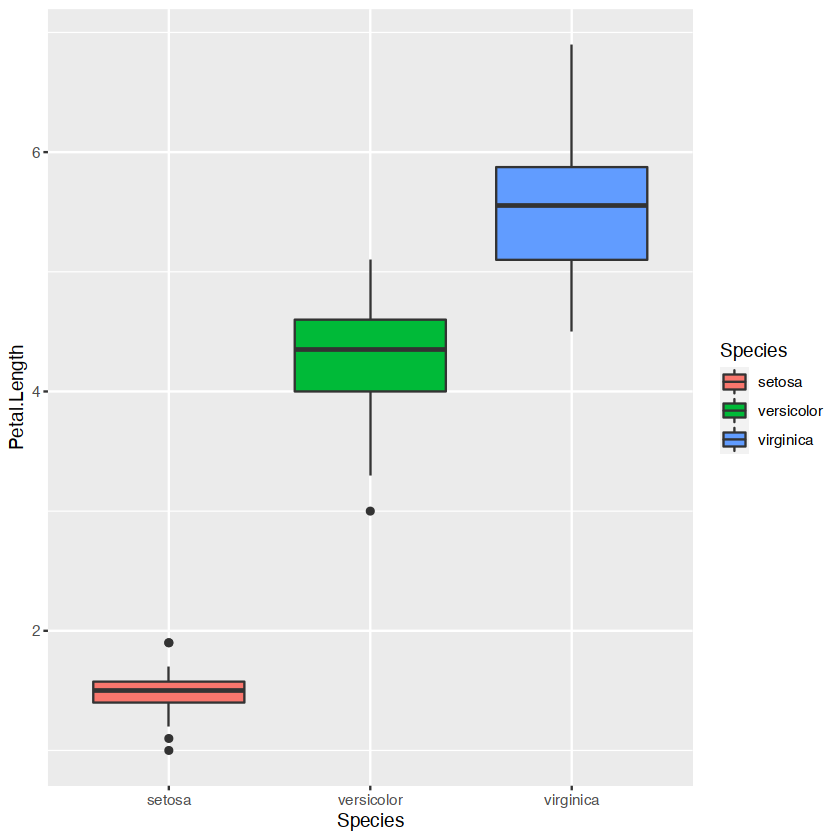

In [50]:
# library(ggplot2)
qplot(Species, Petal.Length, data=iris, geom="boxplot", fill=Species) 

First, we specify the variable on the x axis (the iris species) and then the continuous variable on the y axis (the petal length). Finally, we specify that we are using the iris dataset, that we want a box plot, and that we want to fill the boxes with different colors for each iris species.

Another fun way of comparing distributions between the different categories is using an overlapping density plot:

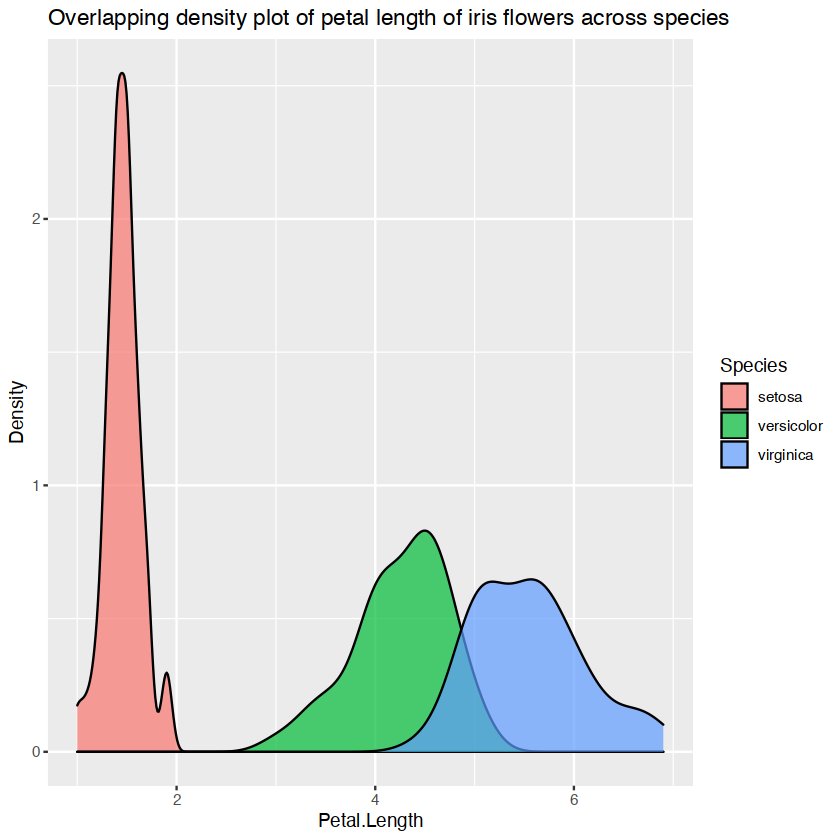

In [51]:
qplot(Petal.Length, data=iris, geom="density", alpha=I(.7), fill=Species, main="Overlapping density plot of petal length of iris flowers across species", ylab="Density") 

If it is not the distribution you are trying to compare but some kind of single-value statistic (like standard deviation or sample counts), you can use the by function to get that value across all categories, and then build a bar plot where each category is a bar and the heights of the bars represent that category's statistic.

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Page 9 - Visualization Methods: Two categorical variables <a class="anchor" id="DS102L1-WS2.5_page_9"></a>

[Back to Top](#DS102L1-WS2.5_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

The visualization of categorical data is a grossly understudied domain and, in spite of some fairly powerful and compelling visualization methods, these techniques remain relatively unpopular.

A favorite method for graphically illustrating contingency tables is to use a mosaic plot. To make mosaic plots, we will need to install and load the VCD (Visualizing Categorical Data) package:

In [52]:
install.packages("vcd") 
library(vcd) 


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpghLOSO/downloaded_packages


Loading required package: grid



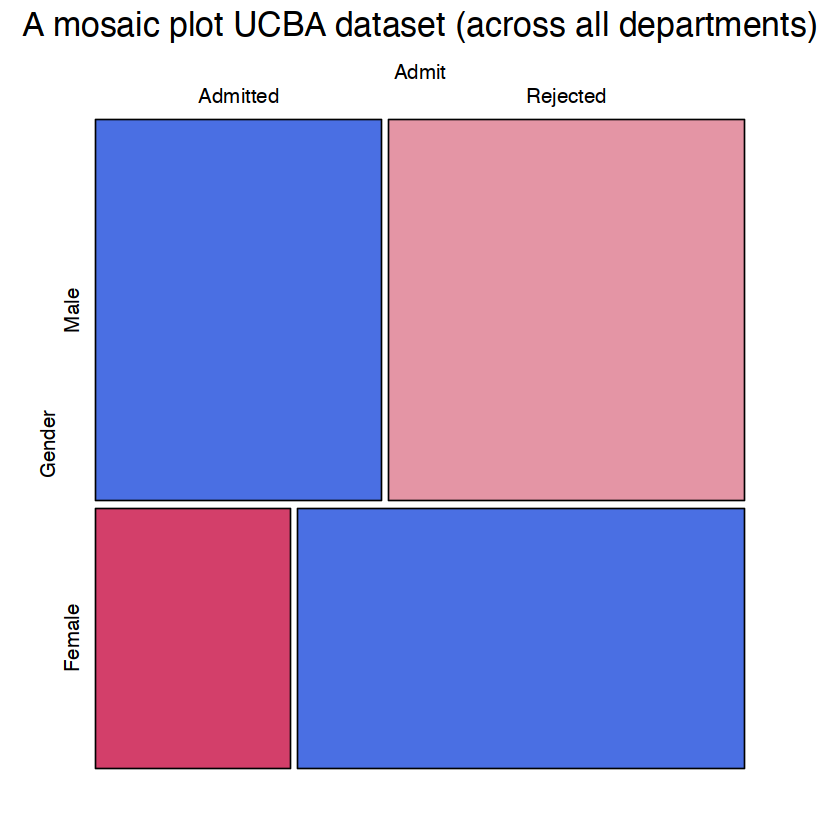

In [53]:
ucba <- data.frame(UCBAdmissions) 
mosaic(Freq ~ Gender + Admit, data=ucba, shade=TRUE, legend=FALSE, main="A mosaic plot UCBA dataset (across all departments)")

The first argument to the mosaic function is a formula. This formula is meant to be read as: display frequency broken down by gender and whether the applicant was admitted. shade=TRUE adds a little life to the plot by adding colors to the boxes. 

The mosaic plot represents each cell of a 2 x 2 contingency table as a tile; the area of the box is proportional to the number of observations in that cell. From this plot, we can easily tell that (a) more men applied to UCB than women, (b) more applicants were rejected than accepted, and (c) women were rejected at a higher proportion than male applicants.

You remember how this was misleading, right? Let's look at the mosaic plot for only department A:

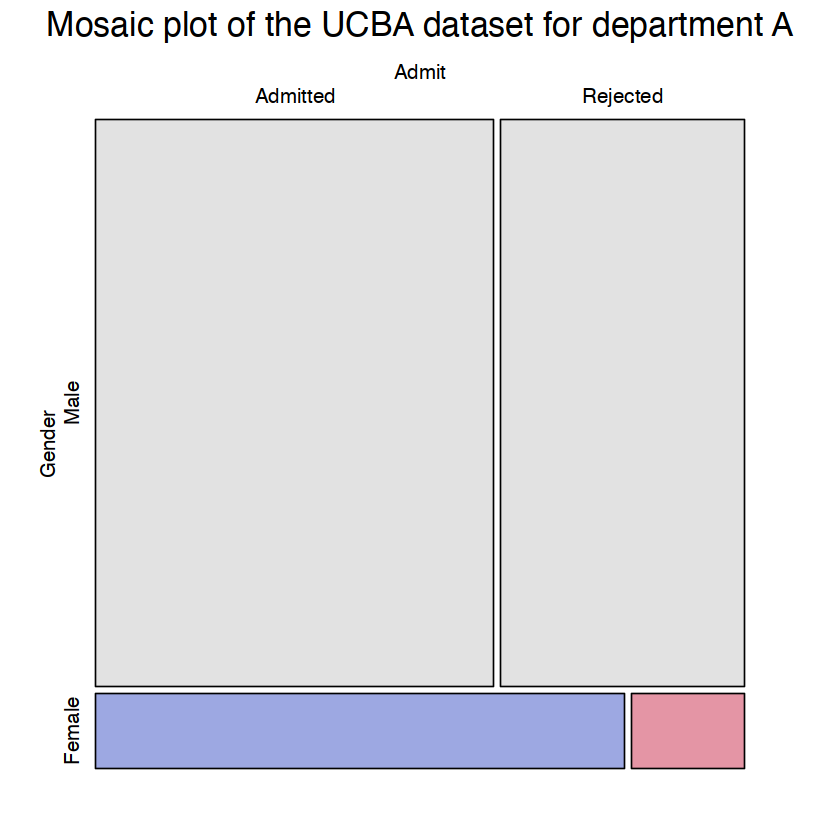

In [54]:
mosaic(Freq ~ Gender+Admit, data=ucba[ucba$Dept=="A",], shade=TRUE, legend=FALSE, main = "Mosaic plot of the UCBA dataset for department A") 

Hopefully, this plot makes the treachery of Simpson's paradox more apparent. Notice how there were far fewer female applicants than males, but the admission rates for the female applicants were much higher. Let's try visualizing the mosaic plots for the other departments!

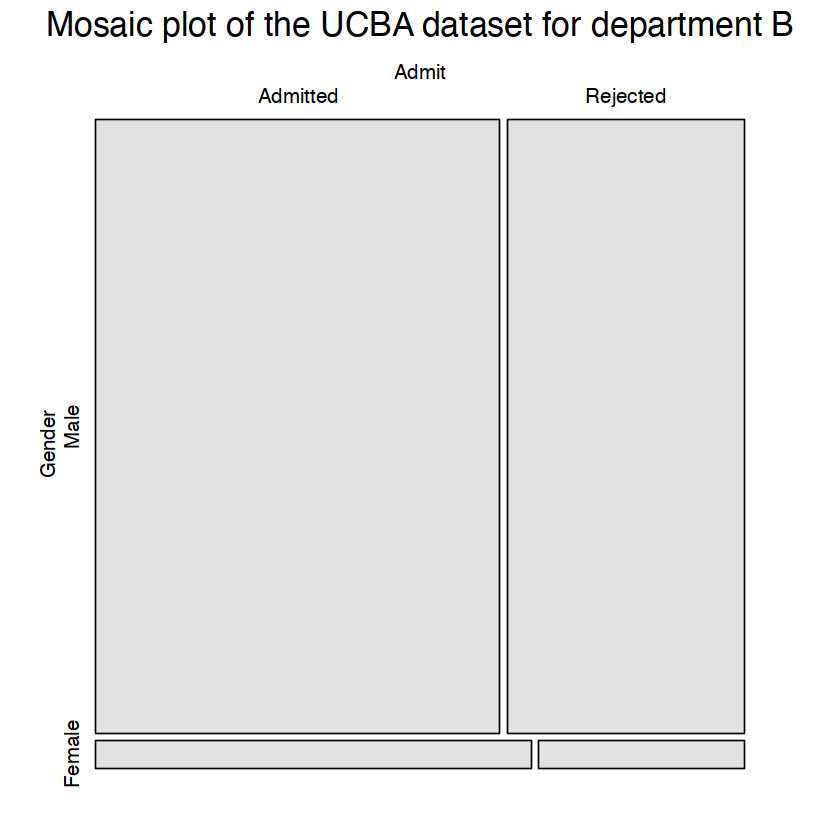

In [56]:
mosaic(Freq ~ Gender+Admit, data=ucba[ucba$Dept=="B",], shade=TRUE, legend=FALSE, main = "Mosaic plot of the UCBA dataset for department B") 

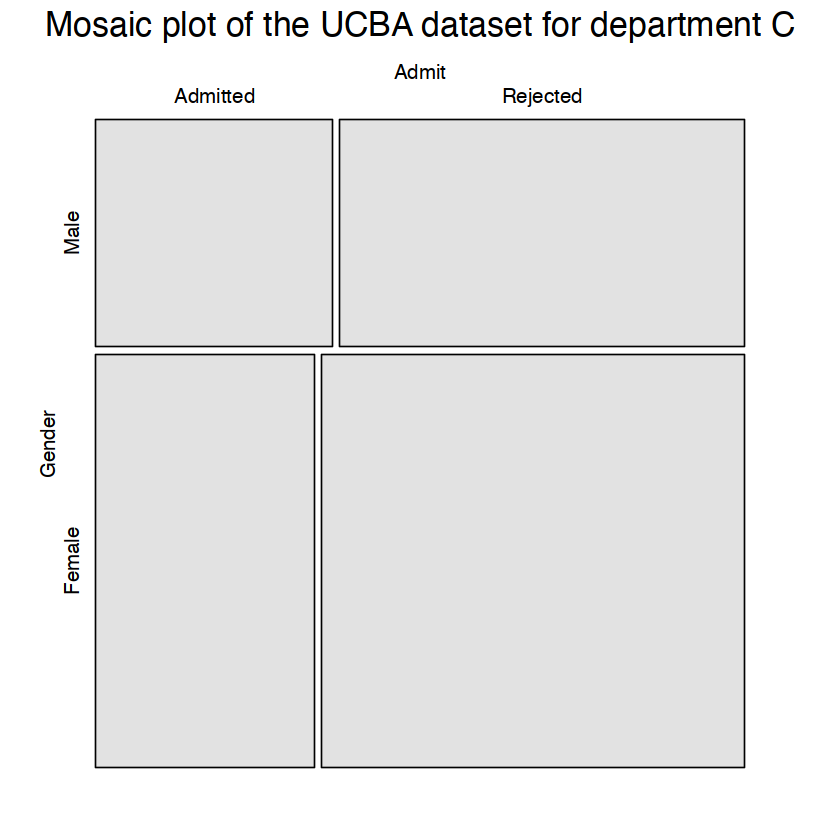

In [57]:
mosaic(Freq ~ Gender+Admit, data=ucba[ucba$Dept=="C",], shade=TRUE, legend=FALSE, main = "Mosaic plot of the UCBA dataset for department C") 

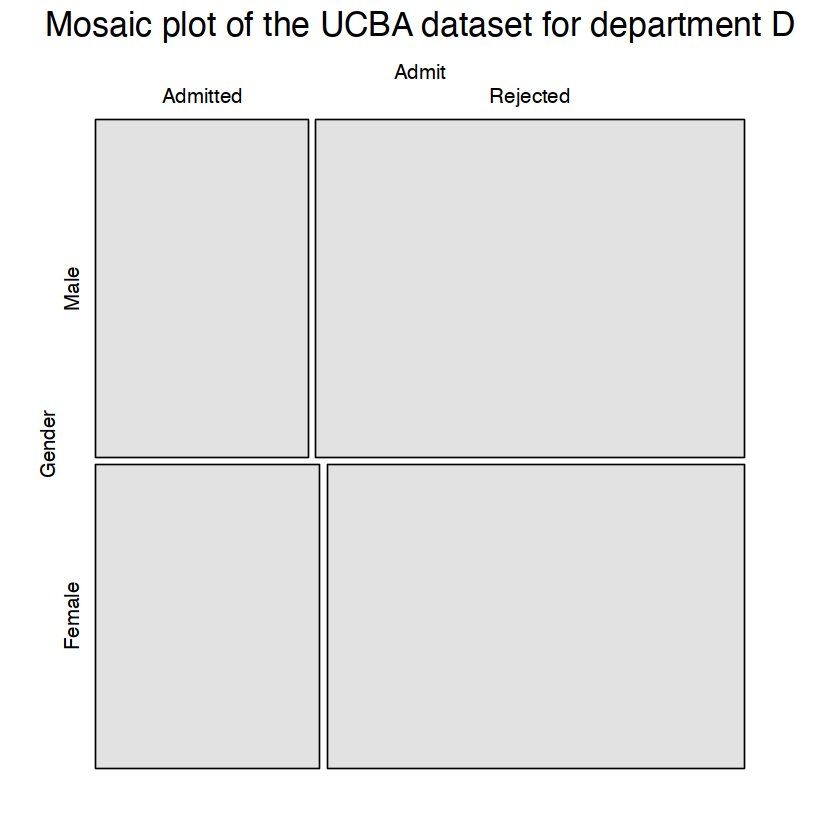

In [58]:
mosaic(Freq ~ Gender+Admit, data=ucba[ucba$Dept=="D",], shade=TRUE, legend=FALSE, main = "Mosaic plot of the UCBA dataset for department D") 

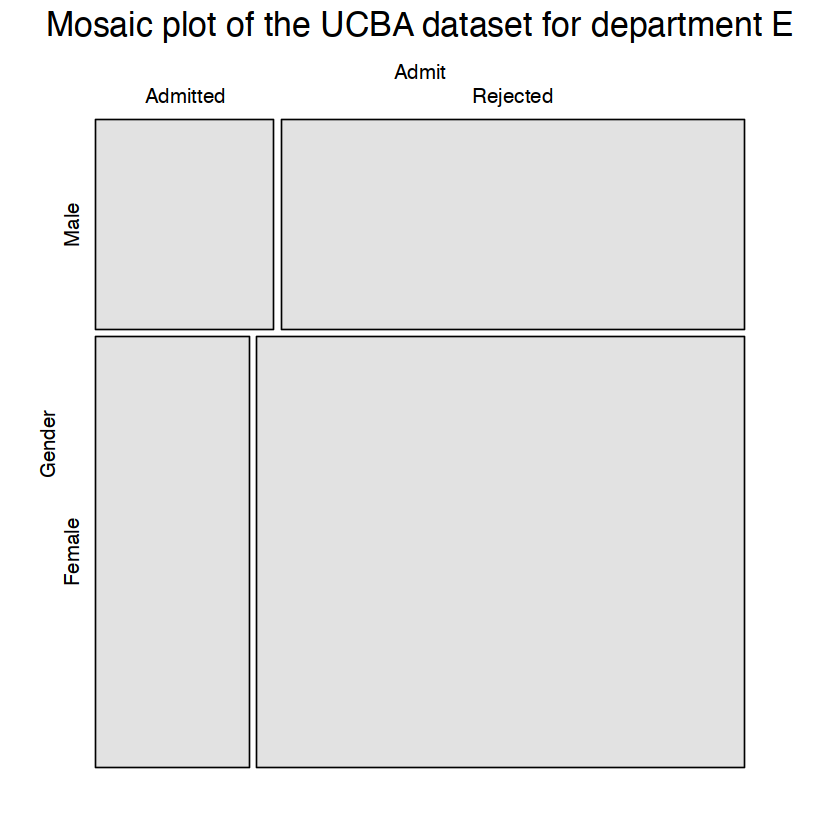

In [59]:
mosaic(Freq ~ Gender+Admit, data=ucba[ucba$Dept=="E",], shade=TRUE, legend=FALSE, main = "Mosaic plot of the UCBA dataset for department E") 

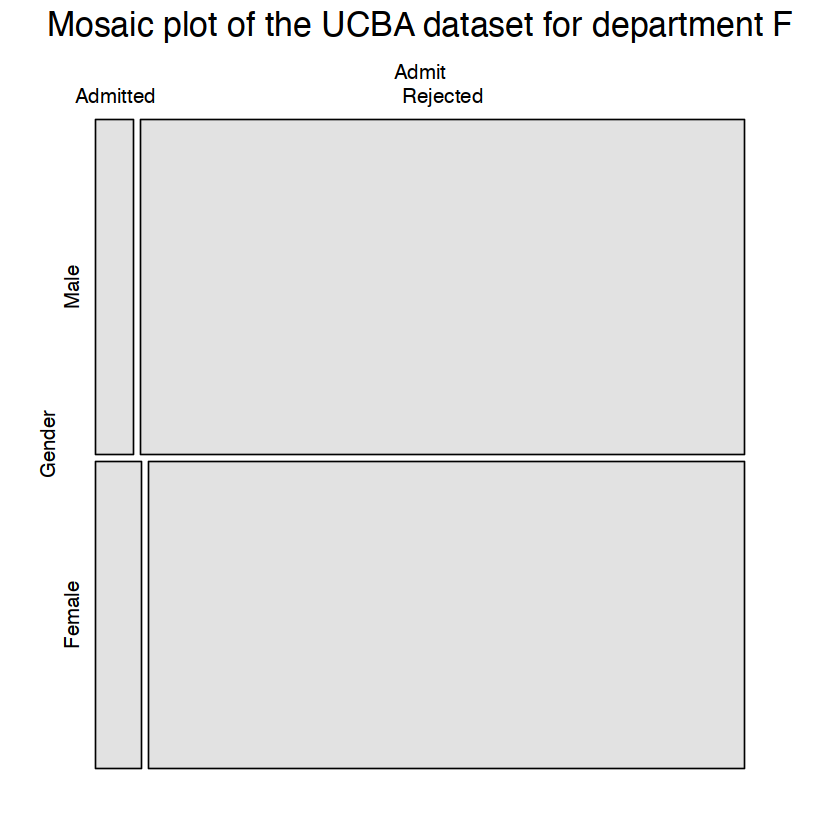

In [60]:
mosaic(Freq ~ Gender+Admit, data=ucba[ucba$Dept=="F",], shade=TRUE, legend=FALSE, main = "Mosaic plot of the UCBA dataset for department F") 

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Page 10 - Visualization Methods: Two continuous variables <a class="anchor" id="DS102L1-WS2.5_page_10"></a>

[Back to Top](#DS102L1-WS2.5_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

The canonical way of displaying relationships between two continuous variables is via scatterplots. The scatterplot for the women's heights and weights that we saw earlier in this section was produced with the following R code snippet:

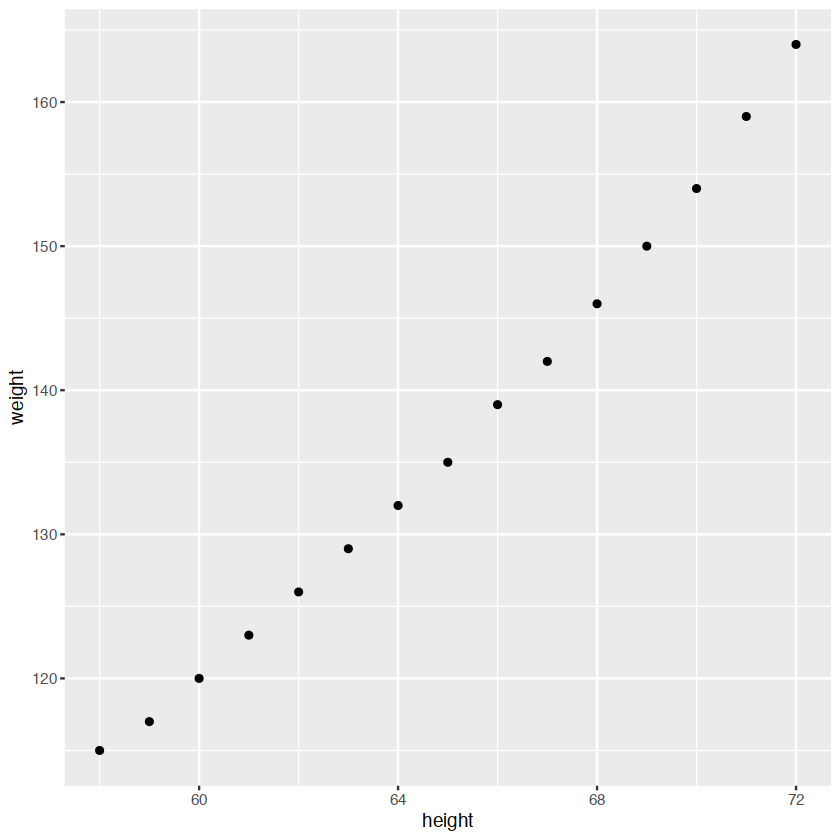

In [61]:
qplot(height, weight, data=women, geom="point") 

Whether you put height and weight first depends on which variable you want tied to the x axis.

What about that fancy regression line?!, you ask frantically. ggplot2 gracefully provides this feature with just a few extra characters. The scatterplot of the relationship between the weight of a car and its miles per gallon was produced as follows:

Warning message:
“Ignoring unknown parameters: method, se”
`geom_smooth()` using formula 'y ~ x'



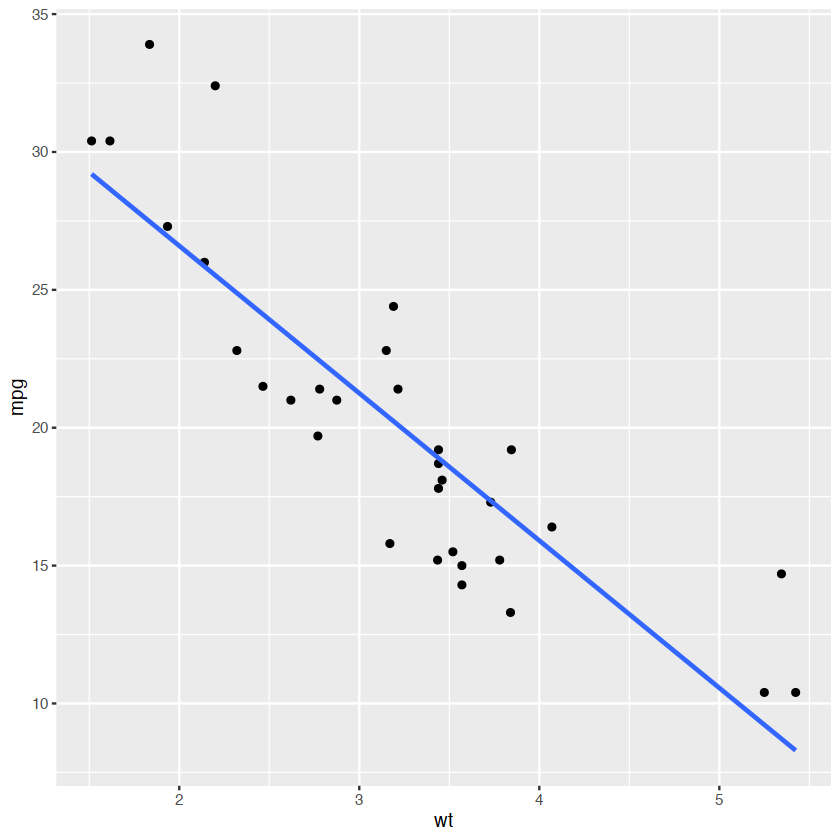

In [62]:
qplot(wt, mpg, data=mtcars, geom=c("point", "smooth"), method="lm", se=FALSE)

Here, we are specifying that we want two kinds of geometric objects, point and smooth. The latter is responsible for the regression line. method="lm" tells qplot that we want to use a linear model to create the trend line.

If we leave out the method, ggplot2 will choose a method automatically; in this case, it would default to a method of drawing a nonlinear trend line called LOESS:

Warning message:
“Ignoring unknown parameters: se”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



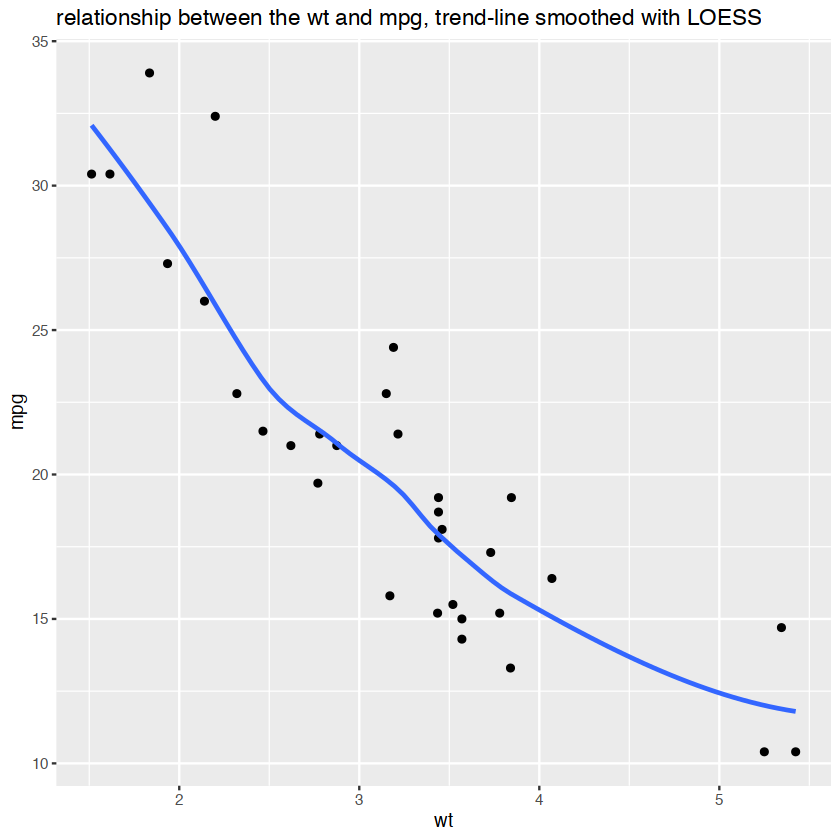

In [63]:
qplot(wt, mpg, data=mtcars, geom=c("point", "smooth"), se=FALSE, main = "relationship between the wt and mpg, trend-line smoothed with LOESS") 

The se=FALSE directive instructs ggplot2 not to plot the estimates of the error.

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Page 11 - Visualization Methods: More than two continuous variables <a class="anchor" id="DS102L1-WS2.5_page_11"></a>

[Back to Top](#DS102L1-WS2.5_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

Finally, there is an excellent way to visualize correlation matrices like the one we saw with the iris dataset in the section, Comparing multiple correlations. To do this, we have to install and load the corrgram package as follows:

In [64]:
install.packages("corrgram") 
library(corrgram) 


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpghLOSO/downloaded_packages


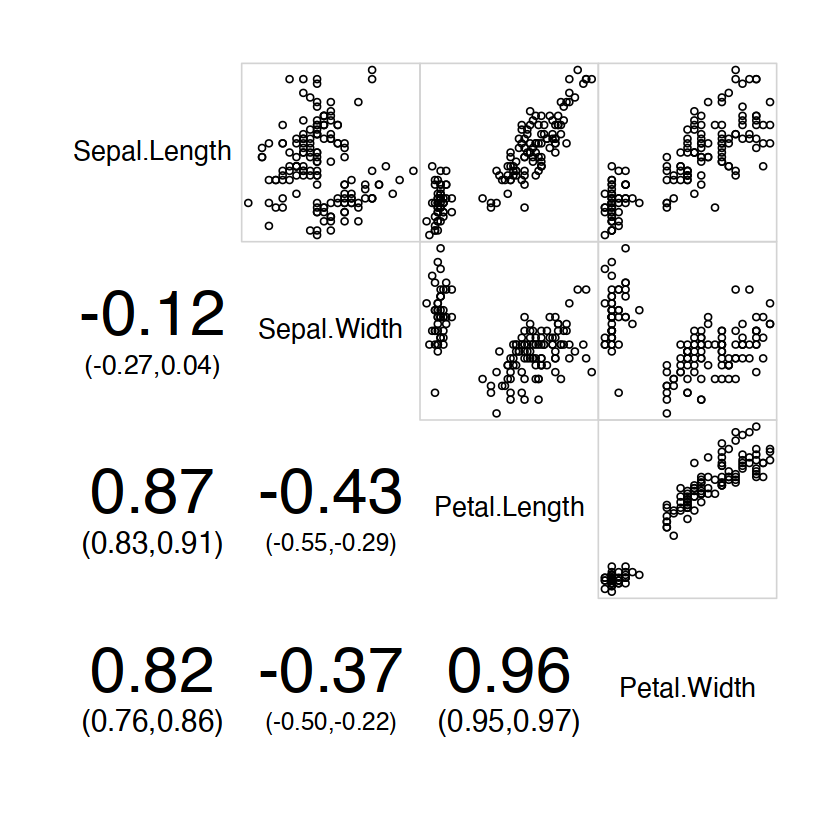

In [65]:
suppressWarnings(corrgram(iris, lower.panel=panel.conf, upper.panel=panel.pts))

With corrgrams, we can exploit the fact that correlation matrices are symmetrical by packing in more information. On the lower left panel, we have the Pearson correlation coefficients (never mind the small ranges beneath each coefficient for now). Instead of repeating these coefficients for the upper right panel, we can show a small scatterplot there instead.

We aren't limited to showing the coefficients and scatterplots in our corrgram, though; there are many other options and configurations available:

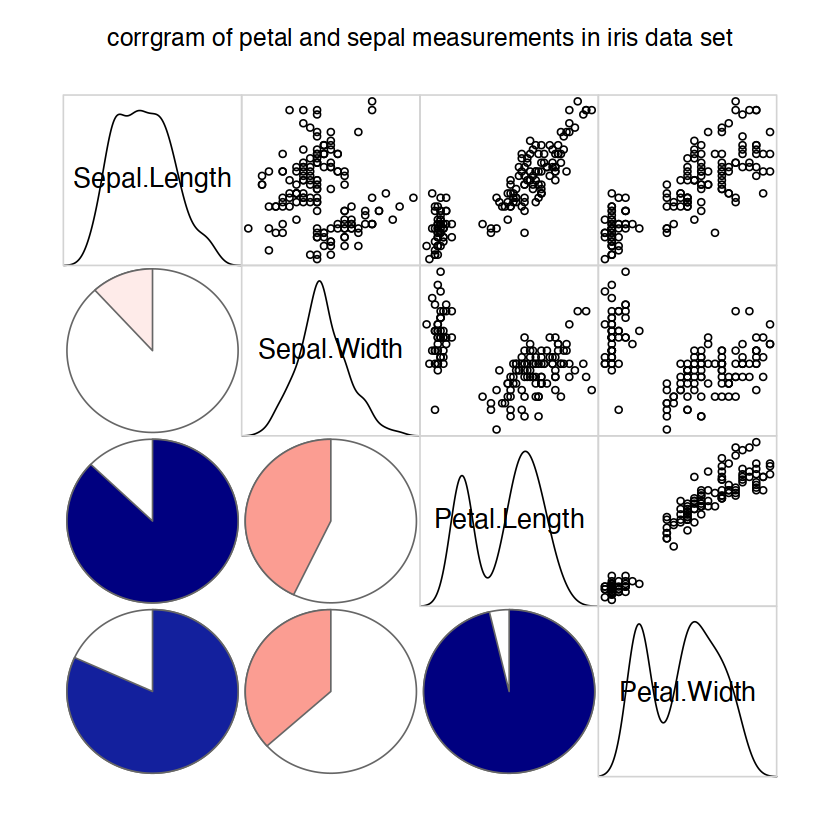

In [66]:
corrgram(iris, lower.panel=panel.pie, upper.panel=panel.pts, 
            diag.panel=panel.density, 
            main=paste0("corrgram of petal and sepal ", 
                        "measurements in iris data set"))

Notice that this time, we can overlay a density plot wherever there is a variable name (on the diagonal) just to get a sense of the variables' shapes. More saliently, instead of text coefficients, we have pie charts in the lower-left panel. These pie charts are meant to graphically depict the strength of the correlations.

If the color of the pie is blue (or any shade thereof), the correlation is positive; the bigger the shaded area of the pie, the stronger the magnitude of the correlation. If, however, the color of the pie is red or a shade of red, the correlation is negative, and the amount of shading on the pie is proportional to the magnitude of the correlation.

To top it all off, we added the main parameter to set the title of the plot. Note the use of paste0 so that I could split the title up into two lines of code.

To get a better sense of what corrgram is capable of, you can view a live demonstration of examples if you execute the following at the prompt:


crrgrm> # To reproduce the figures in Michael Friendly's paper, see the
crrgrm> # vignette, or see the file 'friendly.r' in this package's
crrgrm> # test directory.
crrgrm> 
crrgrm> # Demonstrate density panel, correlation confidence panel
crrgrm> corrgram(iris, lower.panel=panel.pts, upper.panel=panel.conf,
crrgrm+          diag.panel=panel.density)

crrgrm> # Demonstrate panel.shade, panel.pie, principal component ordering
crrgrm> vars2 <- c("Assists","Atbat","Errors","Hits","Homer","logSal",
crrgrm+            "Putouts","RBI","Runs","Walks","Years")

crrgrm> corrgram(baseball[vars2], order=TRUE, main="Baseball data PC2/PC1 order",
crrgrm+          lower.panel=panel.shade, upper.panel=panel.pie)


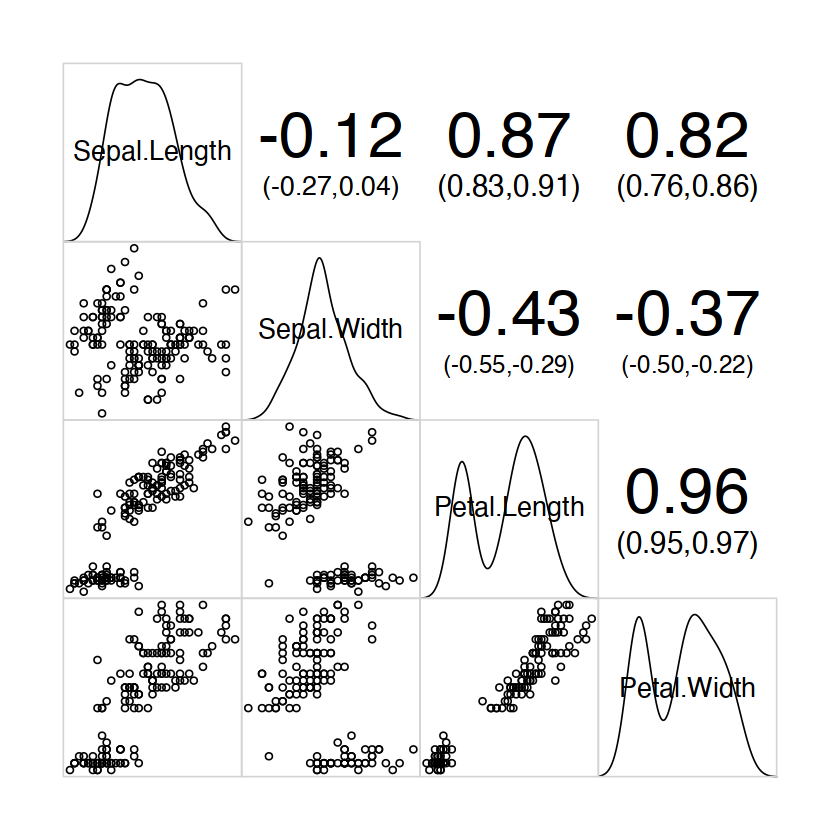


crrgrm> # CAUTION: The latticeExtra package also has a 'panel.ellipse' function
crrgrm> # that clashes with the same-named function in corrgram. In order to use
crrgrm> # the right one, the example below uses 'lower.panel=corrgram::panel.ellipse'.
crrgrm> # If you do not have latticeExtra loaded, you can just use
crrgrm> # 'lower.panel=panel.ellipse'.
crrgrm> 
crrgrm> # Demonstrate panel.bar, panel.ellipse, panel.minmax, col.regions
crrgrm> corrgram(auto, order=TRUE, main="Auto data (PC order)",
crrgrm+          lower.panel=corrgram::panel.ellipse,
crrgrm+          upper.panel=panel.bar, diag.panel=panel.minmax,
crrgrm+          col.regions=colorRampPalette(c("darkgoldenrod4", "burlywood1",
crrgrm+                                         "darkkhaki", "darkgreen")))


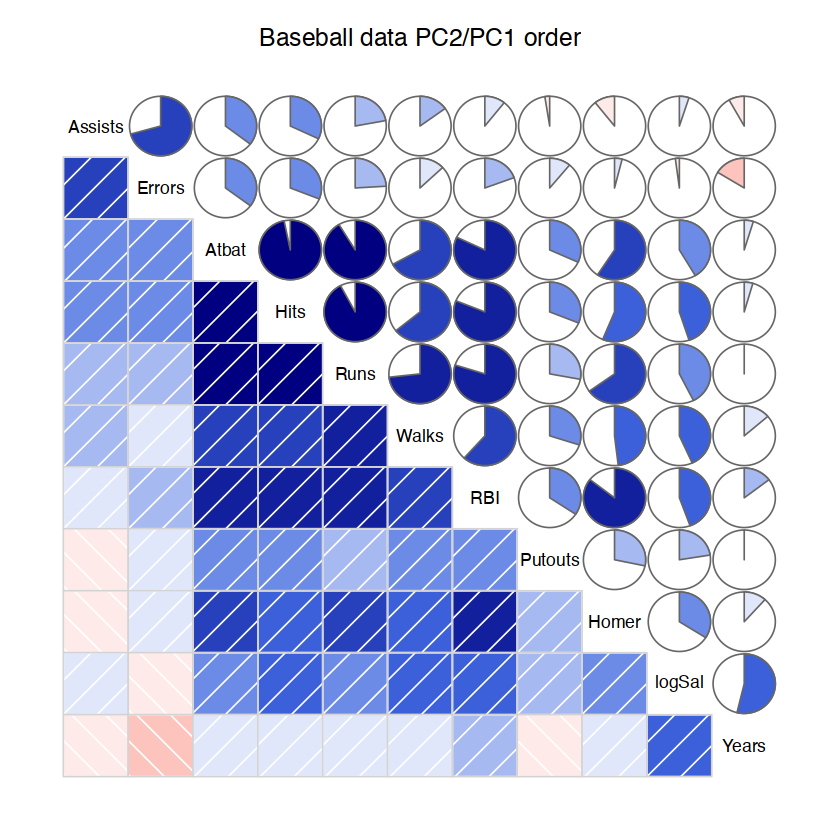


crrgrm> # 'vote' is a correlation matrix, not a data frame
crrgrm> corrgram(vote, order=TRUE, upper.panel=panel.cor)


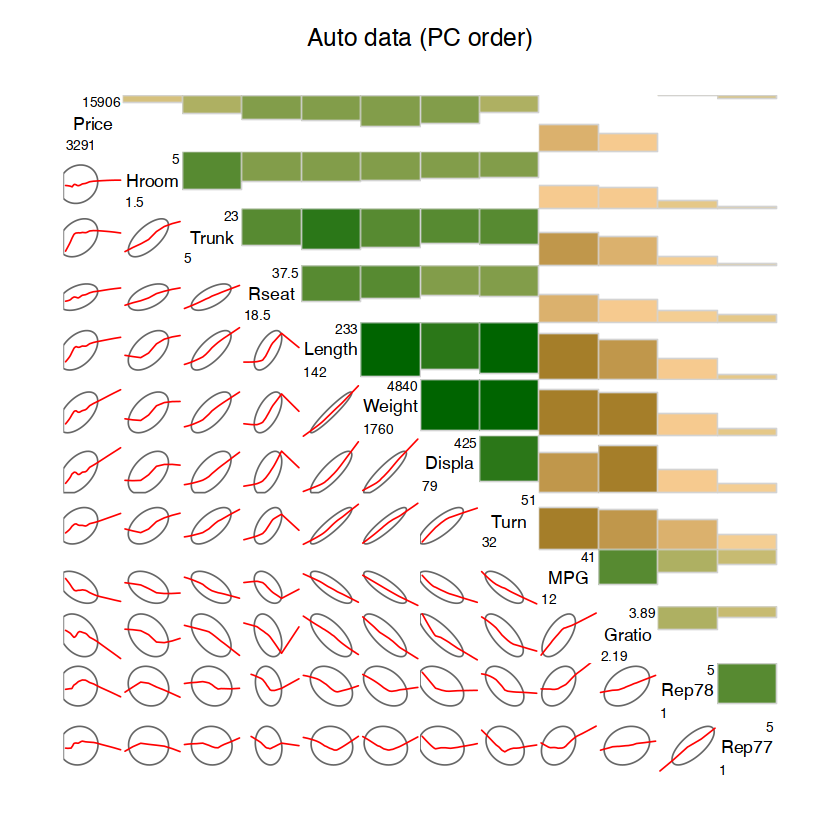


crrgrm> # outer labels, all options, larger margins, xlab, ylab
crrgrm> labs=colnames(state.x77)

crrgrm> corrgram(state.x77, oma=c(7, 7, 2, 2),
crrgrm+          outer.labels=list(bottom=list(labels=labs,cex=1.5,srt=60),
crrgrm+                            left=list(labels=labs,cex=1.5,srt=30,adj=c(1,0))))


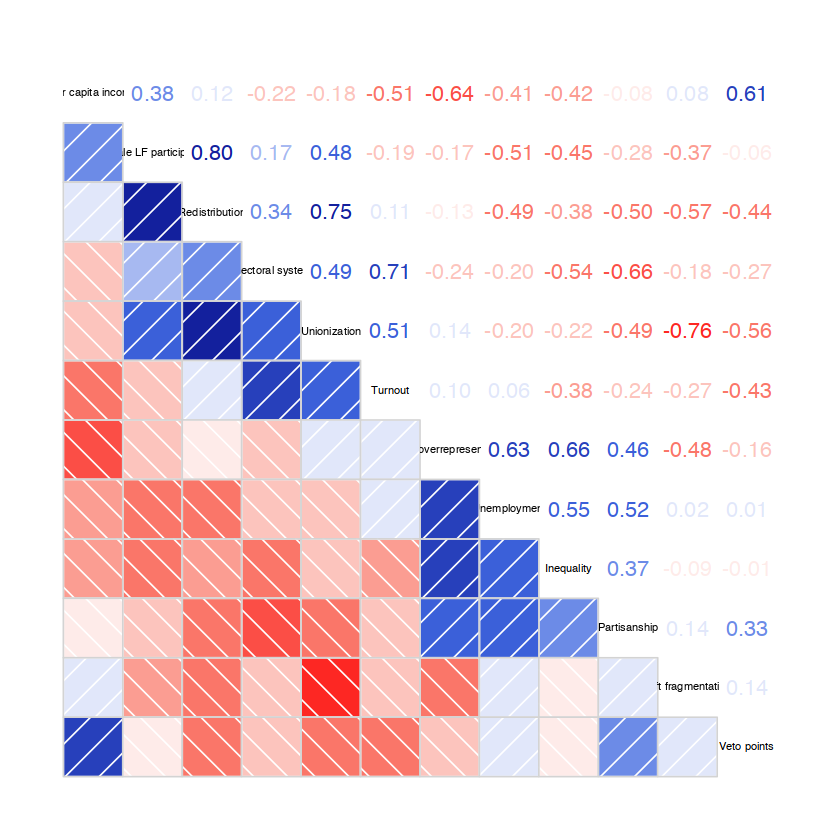


crrgrm> mtext("Bottom", side=1, cex=2, line = -1.5, outer=TRUE, xpd=NA)

crrgrm> mtext("Left", side=2, cex=2, line = -1.5, outer=TRUE, xpd=NA)


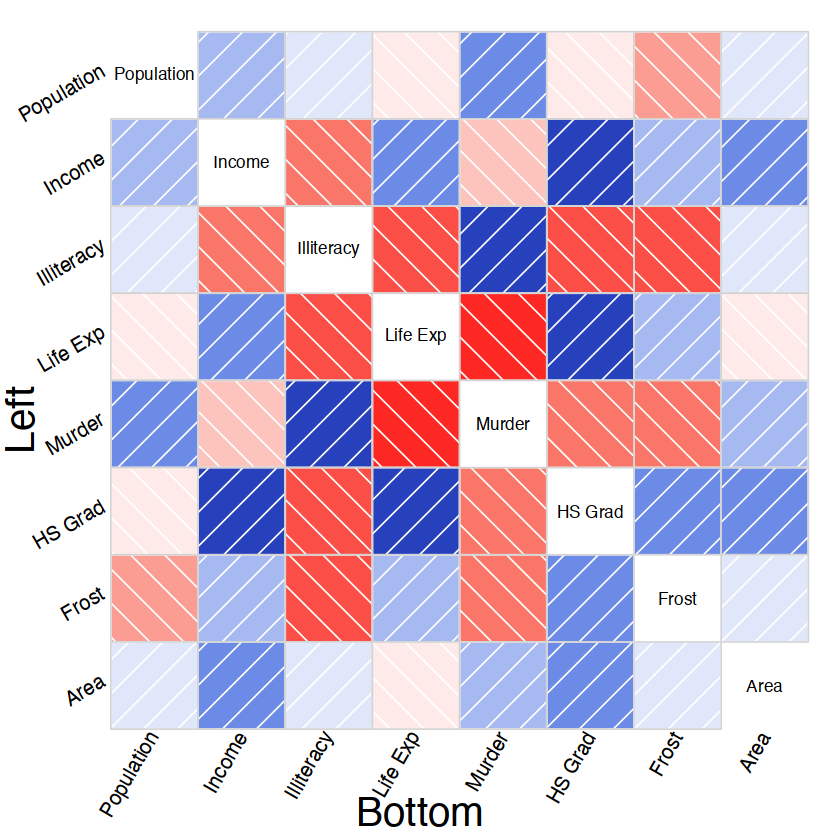

In [67]:
suppressWarnings(example(corrgram)) 

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Page 12 - Summary <a class="anchor" id="DS102L1-WS2.5_page_12"></a>

[Back to Top](#DS102L1-WS2.5_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

There were many new ideas introduced in this section. You're well on the way to being able to tackle some interesting problems on your own!

To summarize, in this workshop, you learned that the relationships between two variables can be broken down into three broad categories.

For __categorical/continuous variables__, you learned how to use the __by__ function to retrieve the statistics on the continuous variable for each category. We also saw how we can use box-and-whisker plots to visually inspect the distributions of the continuous variable across categories.

For __categorical/categorical configurations__, we used __contingency__ and __proportions tables__ to compare frequencies. We also saw how __mosaic plots__ can help spot interesting aspects of the data that might be difficult to detect when just looking at the raw numbers.

For __categorical/continuous data__ we discovered the concepts of covariance and correlations, and explored different __correlation coefficients__ with different assumptions about the nature of the bivariate relationship. You also learned how these concepts could be expanded to describe the relationship between more than __two continuous variables__. Finally, you learned how to use __scatterplots__ and __corrgrams__ to visually depict these relationships.

With this workshop, we've concluded the unit on __exploratory data analysis__, and we'll be moving on to __confirmatory data analysis__ and __inferential statistics__.

[reference](https://learning.oreilly.com/library/view/data-analysis-with/9781788393720/)